In [1]:
import pandas as pd

In [2]:
file_path = r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Pandas\data\health_data.csv'

df = pd.read_csv(file_path)

In [3]:
df.head()

,weight,height,gender
0,65.6,174.0,1
1,71.8,175.3,1
2,80.7,193.5,1
3,72.6,186.5,1
4,78.8,187.2,1


In [4]:
df['weight'].reset_index()

,index,weight
0,0,65.6
1,1,71.8
2,2,80.7
3,3,72.6
4,4,78.8
...,...,...
502,502,71.8
503,503,55.5
504,504,48.6
505,505,66.4


In [5]:
df = pd.read_csv('/workspaces/DScourse/CourseMaterials/Pandas/data/train.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/DScourse/CourseMaterials/Pandas/data/train.csv'

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.groupby('YearBuilt')['SalePrice'].mean().reset_index().head(10)

,YearBuilt,SalePrice
0,1872,122000.00
1,1875,94000.00
2,1880,200619.75
3,1882,168000.00
4,1885,111250.00
5,1890,142200.00
6,1892,291250.00
7,1893,325000.00
8,1898,106000.00
9,1900,112492.60


In [ ]:
divider = 10
df['DecadeBuilt'] = df['YearBuilt'].apply(lambda x: int(x / divider) * divider)
decade_df = df.groupby('DecadeBuilt')['SalePrice'].mean().reset_index().set_index('DecadeBuilt')
decade_df

,SalePrice
DecadeBuilt,
1870,108000.000000
1880,170425.571429
1890,216316.666667
1900,129828.400000
1910,131511.482759
1920,123268.350515
1930,144415.833333
1940,126887.481013
1950,140935.670659


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

/tmp/ipykernel_72282/1480345219.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()], fontdict=font_ax_text)


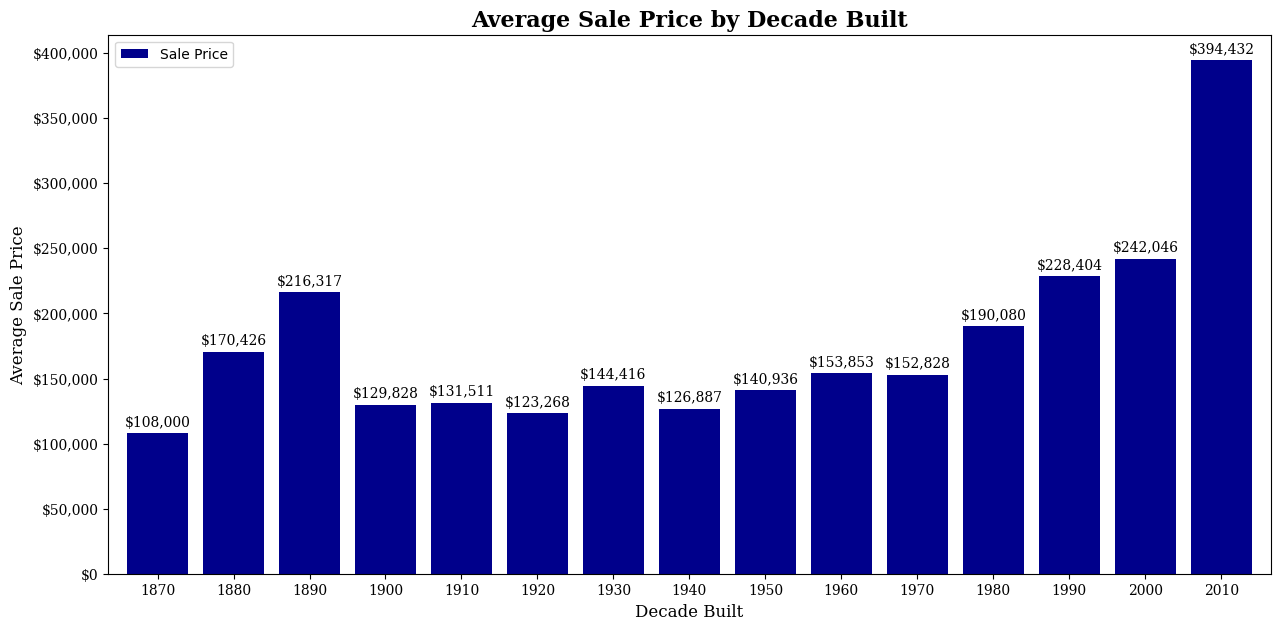

In [ ]:
# font style
font_ax_lebels = {'family':'serif', 'weight': 'normal', 'size': 12, 'color': 'black'}
font_ax_title = {'family':'serif', 'weight': 'bold', 'size': 16, 'color': 'black'}
font_ax_text = {'family':'serif', 'weight': 'normal', 'size': 10, 'color': 'black'}

# plot
ax = decade_df.plot.bar(label='Sale Price per Decade', width=0.8, color='darkblue', figsize=(15, 7))
plt.title('Average Sale Price by Decade Built',fontdict=font_ax_title)
plt.xlabel('Decade Built', fontdict=font_ax_lebels)
plt.ylabel('Average Sale Price', fontdict=font_ax_lebels)
ax.set_xticklabels(decade_df.index, rotation=0, fontdict=font_ax_text)
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()], fontdict=font_ax_text)
plt.legend(['Sale Price'], loc='upper left')

# add labels to bars
ax.bar_label(ax.containers[0], fmt='${:,.0f}', label_type='edge', padding=3, **font_ax_text)

plt.show()